## Nesterov accelerated gradient descent (NGD)

Optimized final point: [0.99998195 1.99996992]


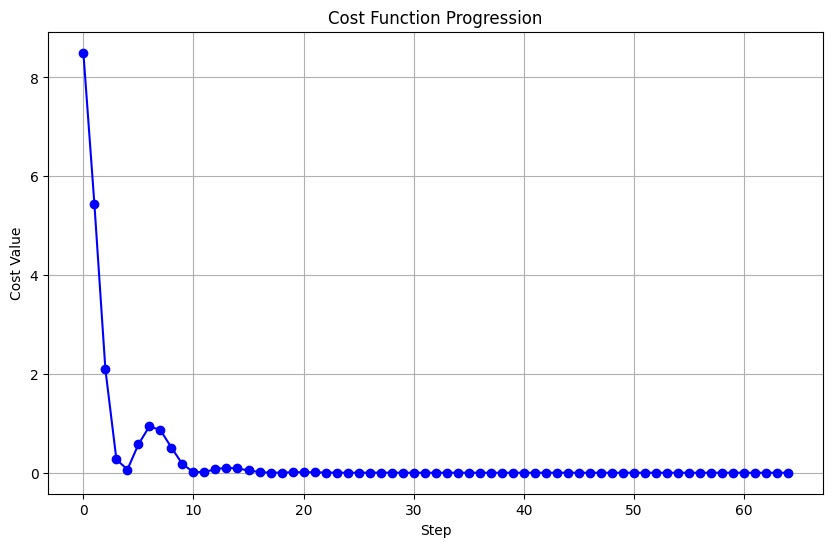

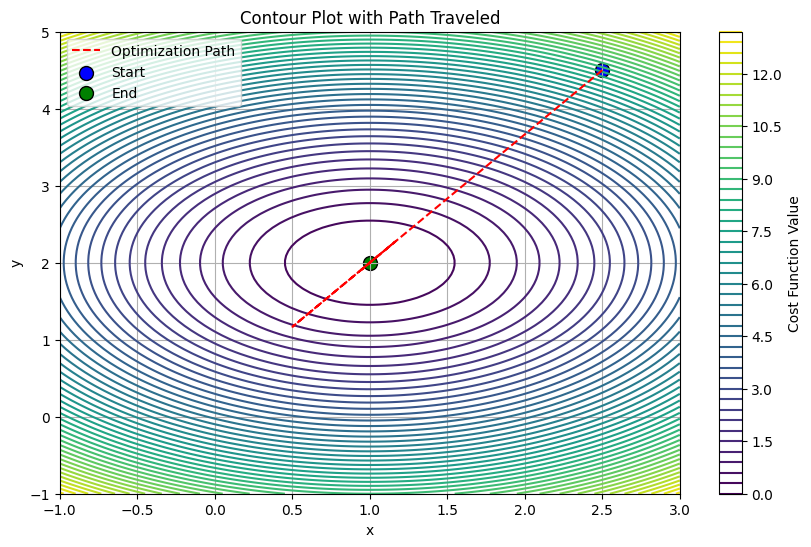

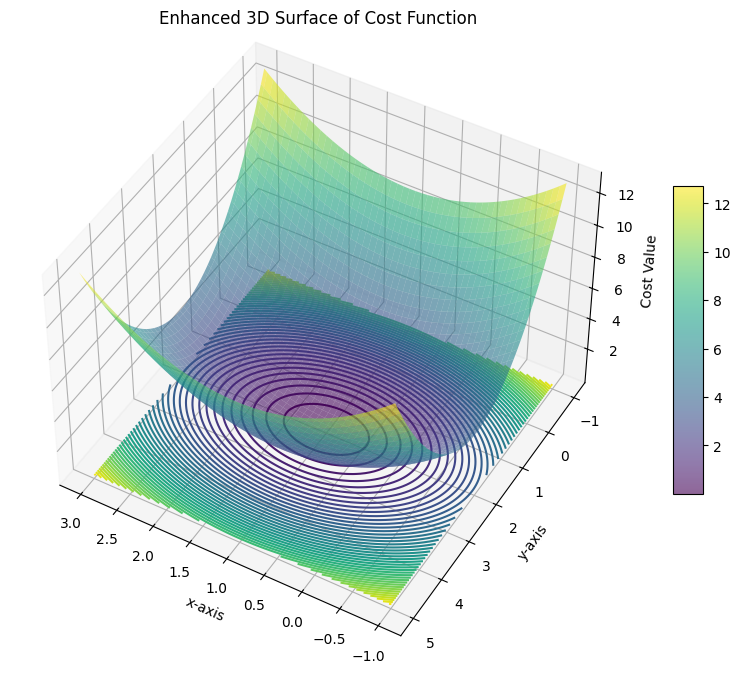

In [3]:

"""
Nesterov Accelerated Gradient Descent (NAGD)

Overview:
Nesterov Accelerated Gradient Descent (NAGD) is an optimization algorithm that improves upon standard momentum-based gradient descent.
It incorporates a "look-ahead" mechanism that allows the algorithm to anticipate the future position of the parameters based on the current momentum.
This results in faster convergence and better performance, especially in high-dimensional spaces.

How NAGD Works:
1. Momentum: NAGD uses a momentum term to accelerate the convergence of the optimization process.
   The momentum term helps to smooth out the updates and can help the algorithm escape local minima.

2. Look-Ahead: The key feature of NAGD is the look-ahead mechanism.
   Instead of computing the gradient at the current position, it computes the gradient at a "look-ahead" position,
   which is determined by the current position minus the momentum term. This allows the algorithm to make more informed updates.

3. Update Rule:
   - Compute the look-ahead position:
     x_lookahead = x(k) - γ * v(k-1)
   - Compute the gradient at the look-ahead position:
     ∇f(x_lookahead)
   - Update the momentum:
     v(k) = γ * v(k-1) + α * ∇f(x_lookahead)
   - Update the parameters:
     x(k+1) = x(k) - v(k)

4. Stopping Criteria: The algorithm continues until the norm of the gradient is less than a predefined threshold ε.

Usage:
This implementation can be used to optimize smooth loss functions in machine learning and other optimization problems.

"""


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class NesterovOptimizer:
    def __init__(self, target_function, grad_function, step_size=0.1, momentum=0.9, tol=1e-5, max_steps=1000):
        self.target_function = target_function  # Function to minimize
        self.grad_function = grad_function  # Gradient of the function
        self.step_size = step_size  # Learning rate
        self.momentum = momentum  # Momentum factor
        self.tol = tol  # Convergence threshold
        self.max_steps = max_steps  # Maximum steps allowed

    def minimize(self, initial_point):
        point = initial_point
        velocity = np.zeros_like(point)  # Initialize velocity
        step_count = 1
        path_traveled = [point.copy()]  # Save path for visualization
        values_over_time = [self.target_function(point)]  # Record function values at each step

        while step_count < self.max_steps:
            # Calculate anticipated position
            temp_position = point - self.momentum * velocity

            # Compute gradient at anticipated position
            grad = self.grad_function(temp_position)

            # Convergence check
            if np.linalg.norm(grad) < self.tol:
                break

            # Update velocity with momentum and step size
            velocity = self.momentum * velocity + self.step_size * grad

            # Update the current point
            point = point - velocity
            path_traveled.append(point.copy())  # Record position
            values_over_time.append(self.target_function(point))  # Track function value
            step_count += 1

        return point, path_traveled, values_over_time

# Test Functions
def cost_function(point):
    """Sample cost function: f(point) = (point[0] - 1)^2 + (point[1] - 2)^2"""
    return (point[0] - 1) ** 2 + (point[1] - 2) ** 2

def grad_of_cost(point):
    """Gradient of the cost function"""
    return np.array([2 * (point[0] - 1), 2 * (point[1] - 2)])

# Visualization Functions
def display_optimization_path(path_traveled):
    """Show path taken by optimizer on contour plot of cost function"""
    x_vals = np.linspace(-1, 3, 100)
    y_vals = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = cost_function(np.array([X, Y]))

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Cost Function Value')

    path = np.array(path_traveled)
    plt.plot(path[:, 0], path[:, 1], 'r--', label='Optimization Path')
    plt.scatter(path[0, 0], path[0, 1], color='blue', s=100, edgecolor='black', label='Start')
    plt.scatter(path[-1, 0], path[-1, 1], color='green', s=100, edgecolor='black', label='End')
    plt.title("Contour Plot with Path Traveled")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

def show_progress_over_iterations(values_over_time):
    """Plot cost function value across iterations"""
    plt.figure(figsize=(10, 6))
    plt.plot(values_over_time, 'b-o')
    plt.title("Cost Function Progression")
    plt.xlabel("Step")
    plt.ylabel("Cost Value")
    plt.grid(True)
    plt.show()

def display_3d_surface():
    """3D plot of cost function."""
    x_vals = np.linspace(-1, 3, 100)
    y_vals = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = cost_function(np.array([X, Y]))

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    ax.contour3D(X, Y, Z, 50, cmap='viridis', offset=np.min(Z), linestyles="solid")  # Add contour lines for depth
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

    # Setting the view angle for better depth perception
    ax.view_init(elev=45, azim=120)
    ax.set_title("Enhanced 3D Surface of Cost Function")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("Cost Value")

    plt.show()


# Execution
if __name__ == "__main__":
    initial_point = np.array([2.5, 4.5])
    optimizer = NesterovOptimizer(cost_function, grad_of_cost, step_size=0.1, momentum=0.9)
    final_point, path_traveled, values_over_time = optimizer.minimize(initial_point)

    print("Optimized final point:", final_point)

    # Display all visualizations
    show_progress_over_iterations(values_over_time)
    display_optimization_path(path_traveled)
    display_3d_surface()
